In [1]:
# Step 1: Imports and setup
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import queries as q



In [2]:

# Step 2: Load environment variables
load_dotenv()
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")



In [3]:

# Step 3: Fetch function
def fetch_query_to_df(query):
    try:
        conn = mysql.connector.connect(
            user=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT,
            database=DB_NAME
        )
        cursor = conn.cursor(dictionary=True)
        cursor.execute(query)
        rows = cursor.fetchall()
        df = pd.DataFrame(rows)
        return df
    except mysql.connector.Error as err:
        print(f"Connection error: {err}")
        return pd.DataFrame()
    finally:
        if 'cursor' in locals():
            cursor.close()
        if 'conn' in locals():
            conn.close()



Step 4: Run SQL & Visualize

Transaction Trends by State and Quarter

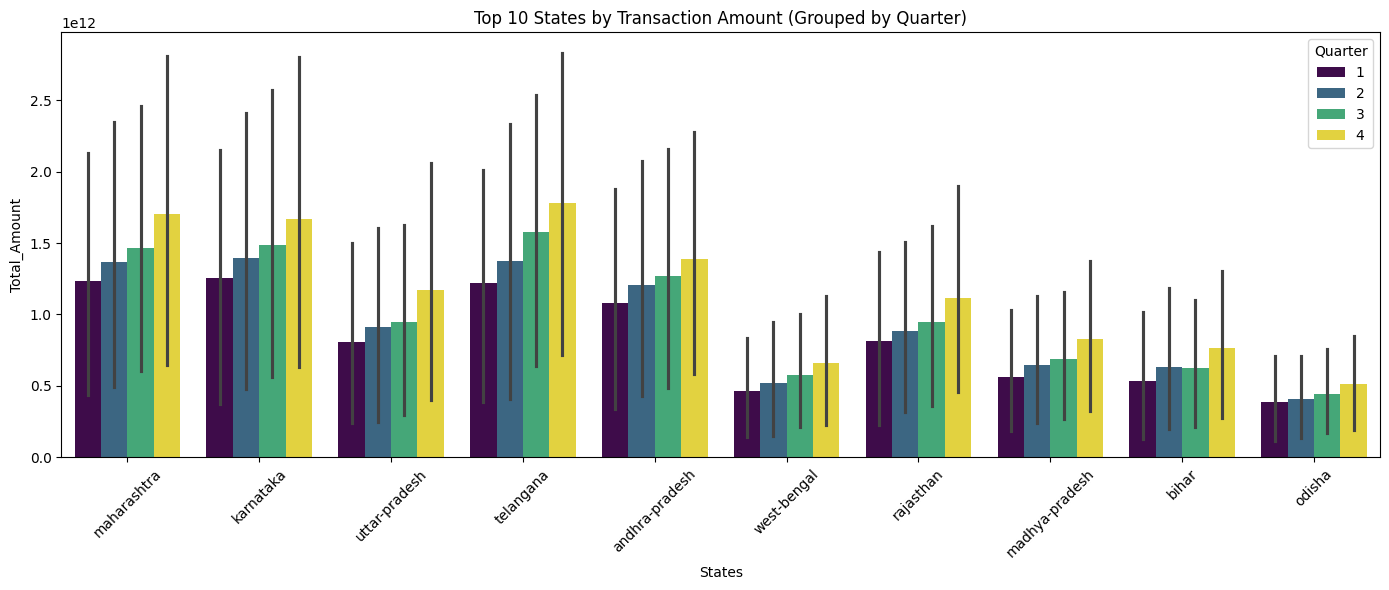

In [4]:
# Fetch full data (no LIMIT in SQL)
df_tx_state = fetch_query_to_df(q.transaction_by_state_quarter)

# Step 1: Calculate total amount per state across all quarters
total_by_state = (
    df_tx_state.groupby("States", as_index=False)["Total_Amount"]
    .sum()
    .sort_values(by="Total_Amount", ascending=False)
    .head(10)
)

# Step 2: Filter original DataFrame to include only top 10 states
top_states = total_by_state["States"].tolist()
filtered_df = df_tx_state[df_tx_state["States"].isin(top_states)]

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=filtered_df, x="States", y="Total_Amount", hue="Quarter", palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 States by Transaction Amount (Grouped by Quarter)")
plt.tight_layout()
plt.show()



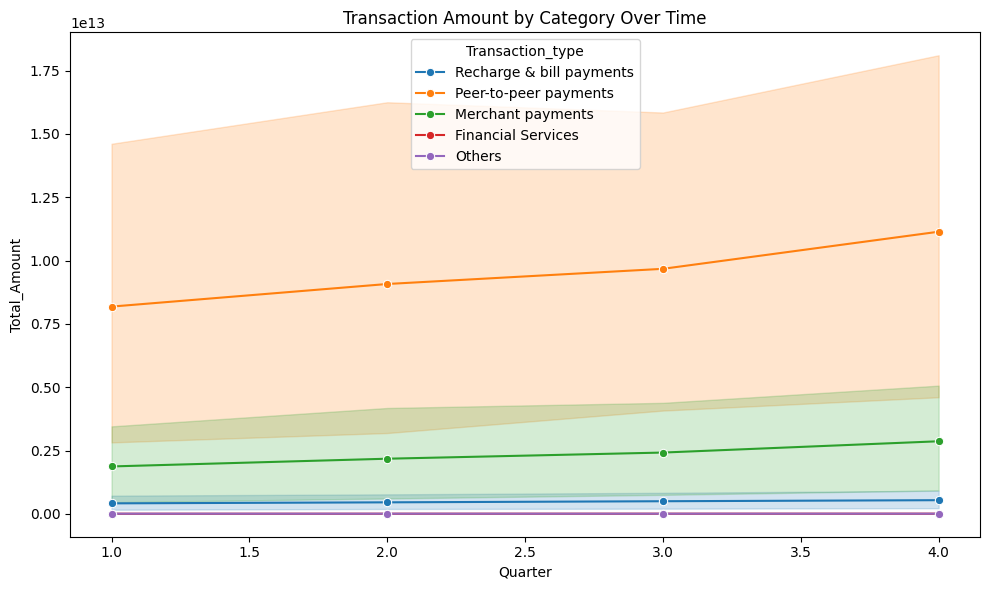

In [5]:
df_tx_cat = fetch_query_to_df(q.transaction_by_category)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_tx_cat, x="Quarter", y="Total_Amount", hue="Transaction_type", marker="o")
plt.title("Transaction Amount by Category Over Time")
plt.tight_layout()
plt.show()

Device Usage

C:\Users\singh\AppData\Local\Temp\ipykernel_16372\666851606.py:6: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\singh\Masters in Data Science\PROJECTS\pulse_data_project\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


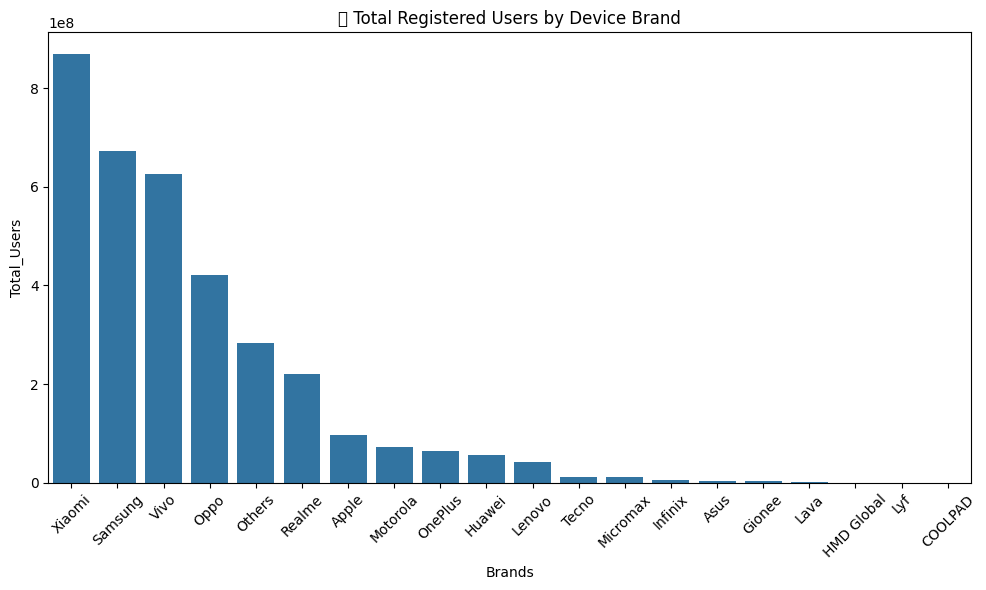

In [6]:


df_devices = fetch_query_to_df(q.users_by_device_brand)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_devices, x="Brands", y="Total_Users")
plt.title("📱 Total Registered Users by Device Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


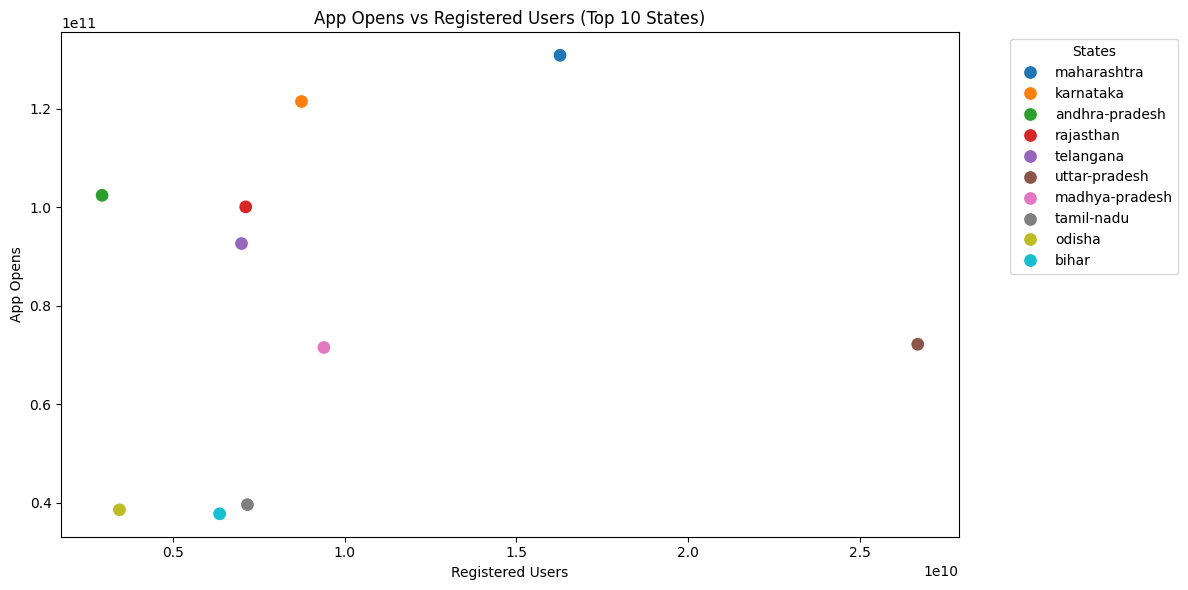

In [7]:
df_app_opens = fetch_query_to_df(q.app_opens_by_state)
high_apps = df_app_opens.sort_values(by="AppOpens", ascending=False).head(10)

plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=high_apps,
    x="RegisteredUsers",
    y="AppOpens",
    hue="States",          # Enables colored dots per state
    palette="tab10",
    s=100                  # Size of dots
)

plt.title("App Opens vs Registered Users (Top 10 States)")
plt.xlabel("Registered Users")
plt.ylabel("App Opens")
plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Insurance Penetration & Growth Potential

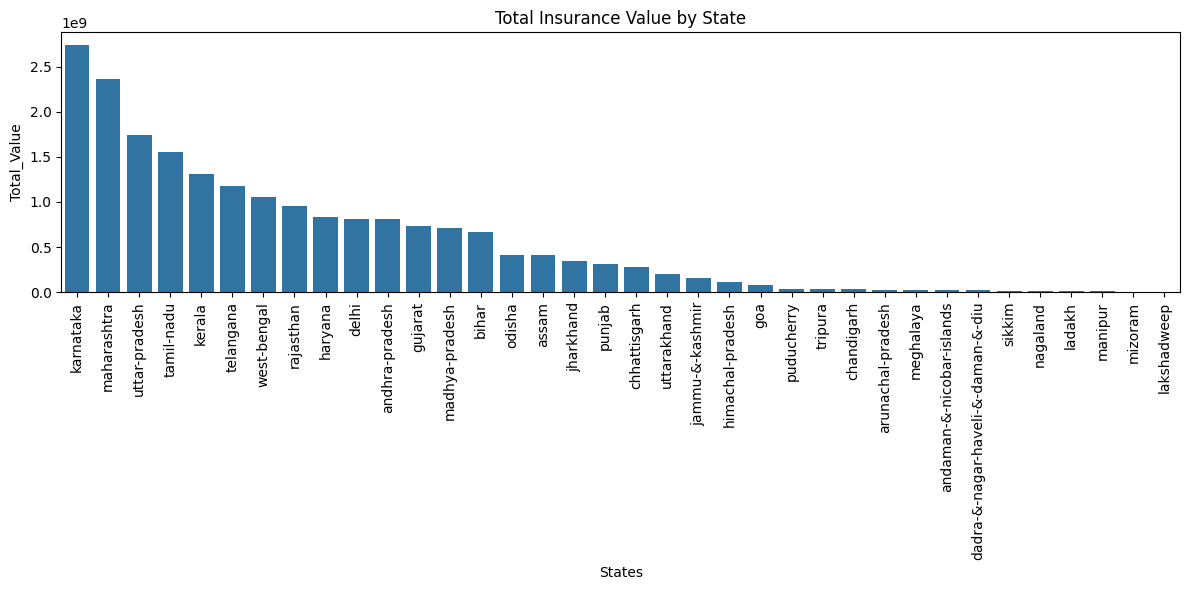

In [8]:


df_ins_summary = fetch_query_to_df(q.insurance_summary_by_state)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_ins_summary, x="States", y="Total_Value")
plt.title("Total Insurance Value by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


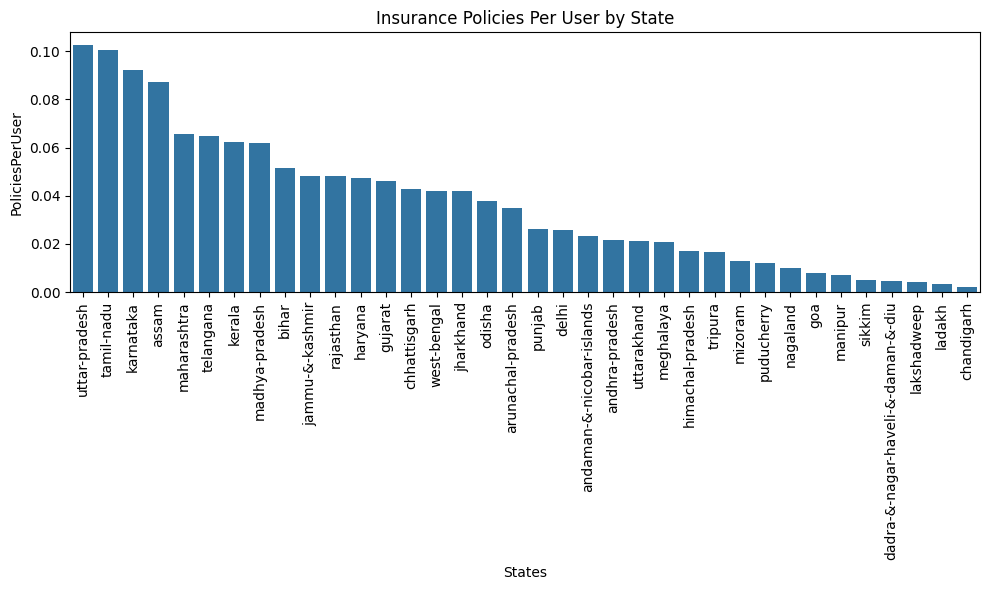

In [9]:
df_ins_per_user = fetch_query_to_df(q.insurance_per_user)
plt.figure(figsize=(10, 6))
sns.barplot(data=df_ins_per_user, x="States", y="PoliciesPerUser")
plt.title("Insurance Policies Per User by State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Transaction Insights for Market Expansion

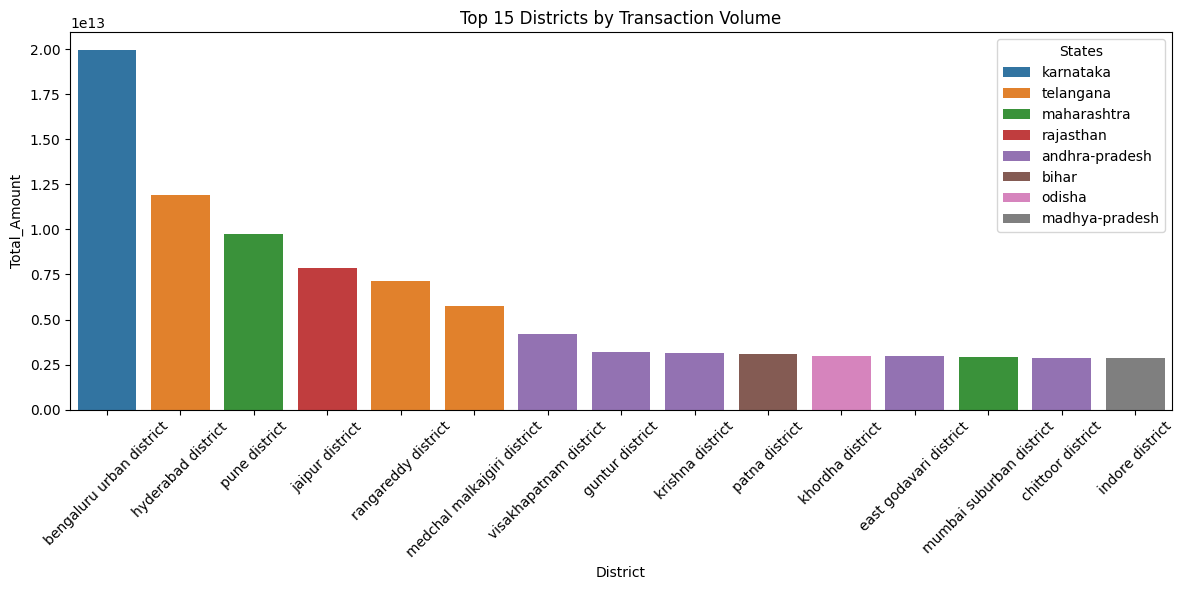

In [10]:


df_top_districts = fetch_query_to_df(q.top_districts_by_transaction)
high_volume = df_top_districts.sort_values(by="Total_Amount", ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(data=high_volume, x="District", y="Total_Amount", hue="States")
plt.title("Top 15 Districts by Transaction Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


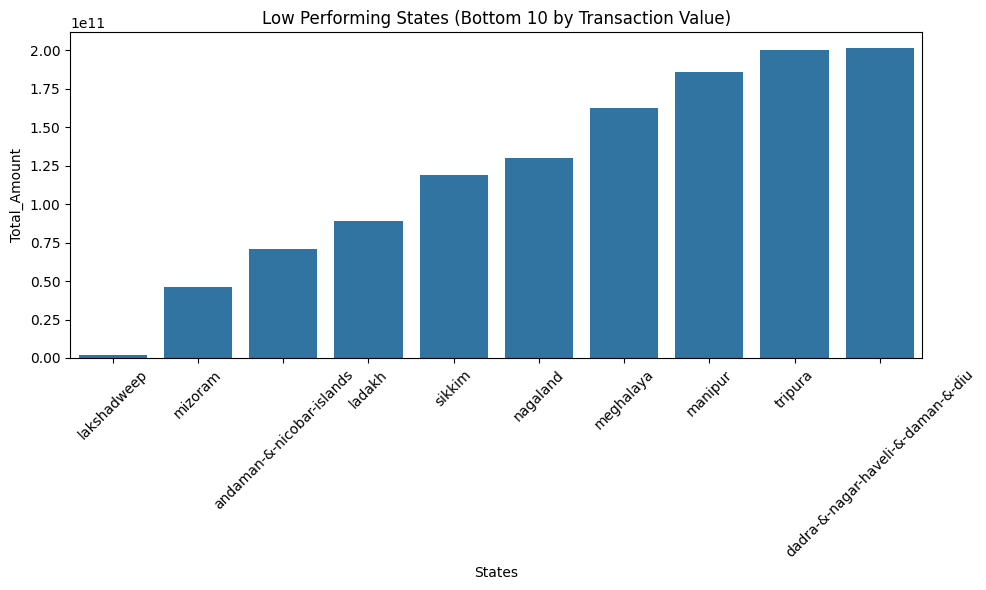

In [11]:
df_low_states = fetch_query_to_df(q.low_performing_states)
low_states = df_low_states.sort_values(by="Total_Amount", ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=low_states, x="States", y="Total_Amount")
plt.title("Low Performing States (Bottom 10 by Transaction Value)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


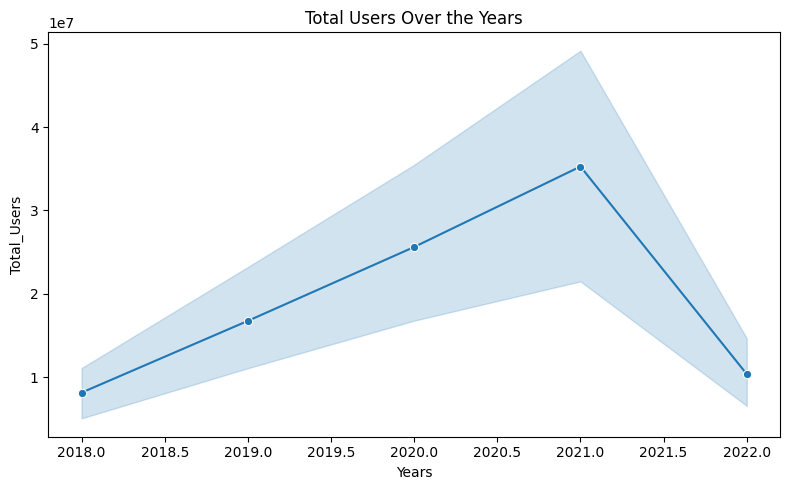

In [12]:
# User Engagement and Growth Strategy

df_user_growth = fetch_query_to_df(q.yearly_user_growth)
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_user_growth, x="Years", y="Total_Users", marker="o")
plt.title("Total Users Over the Years")
plt.tight_layout()
plt.show()


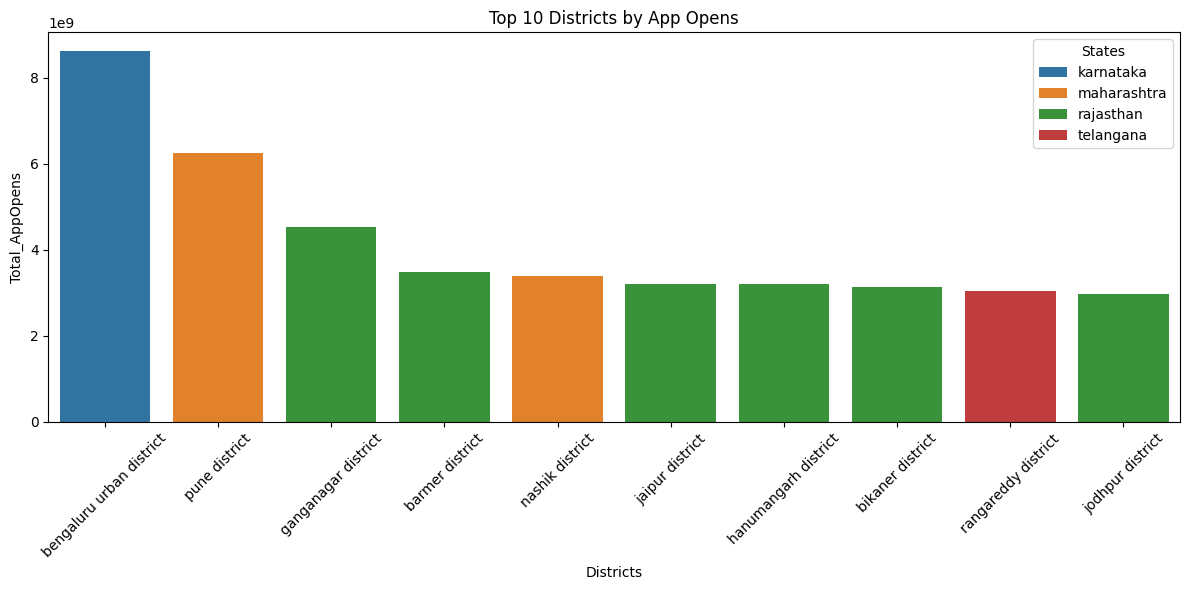

In [13]:


df_top_app = fetch_query_to_df(q.top_districts_by_app_opens)

top_districts = df_top_app.sort_values(by="Total_AppOpens", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_districts, x="Districts", y="Total_AppOpens", hue="States")
plt.title("Top 10 Districts by App Opens")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
